# Voting Classifier

In [56]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier

from sklearn.metrics import classification_report

## Data

In [57]:
wine=pd.read_csv('white_wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [58]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               1
alcohol                 1
quality                 1
dtype: int64

In [59]:
wine['alcohol']=wine['alcohol'].fillna(wine['alcohol'].mean())

In [60]:
wine['label']=np.where(wine['quality']>6,1,0)

In [61]:
x=wine[['alcohol','density']]
y=wine['label']

## Splitting

In [62]:
x_train, x_test, y_train, y_test= train_test_split(x,y,
                                                  stratify=y,
                                                  test_size=0.2,
                                                  random_state=2020)

## basic base learners

### stand alone models

In [63]:
models={
    'logistic regression':LogisticRegression(),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(max_depth=5)
}

In [64]:
for i,j in models.items():
    j.fit(x_train,y_train)
    y_pred= j.predict(x_test)
    print(i)
    print(classification_report(y_test,y_pred))

logistic regression
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        84
           1       0.75      0.45      0.56        20

    accuracy                           0.87       104
   macro avg       0.82      0.71      0.74       104
weighted avg       0.86      0.87      0.85       104

KNN
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        84
           1       0.75      0.75      0.75        20

    accuracy                           0.90       104
   macro avg       0.85      0.85      0.85       104
weighted avg       0.90      0.90      0.90       104

Decision Tree
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        84
           1       1.00      0.90      0.95        20

    accuracy                           0.98       104
   macro avg       0.99      0.95      0.97       104
weighted avg       0.98      0.98   

### Voting Classifier

In [65]:
lr= LogisticRegression()
knn= KNeighborsClassifier(n_neighbors=3)
dt=DecisionTreeClassifier(max_depth=5)

In [66]:
vc=VotingClassifier([
    ('model1',lr),
    ('model2',knn),
    ('model3',dt)
])

In [67]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('model1', LogisticRegression()),
                             ('model2', KNeighborsClassifier(n_neighbors=3)),
                             ('model3', DecisionTreeClassifier(max_depth=5))])

In [68]:
y_pred=vc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        84
           1       1.00      0.80      0.89        20

    accuracy                           0.96       104
   macro avg       0.98      0.90      0.93       104
weighted avg       0.96      0.96      0.96       104



## Improve base learners

### stand alone models

In [14]:
lr= LogisticRegression(solver='liblinear', C=0.01)
lr_poly=PolynomialFeatures(degree=3,interaction_only=False, include_bias=False)
lr_pipe= Pipeline([
    ('poly',lr_poly),
    ('model',lr)
])

In [15]:
knn=KNeighborsClassifier(n_neighbors=3)
knn_pipe=Pipeline([
    ('preprocess', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=3))
])


In [16]:
dt= DecisionTreeClassifier(max_depth=5)

In [17]:
models={
    'logistic regression':lr_pipe,
    'KNN': knn_pipe,
    'Decision Tree': dt
}

In [18]:
for i,j in models.items():
    j.fit(x_train,y_train)
    y_pred= j.predict(x_test)
    print(i)
    print(classification_report(y_test,y_pred))

logistic regression
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        84
           1       0.75      0.45      0.56        20

    accuracy                           0.87       104
   macro avg       0.82      0.71      0.74       104
weighted avg       0.86      0.87      0.85       104

KNN
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        84
           1       0.95      0.95      0.95        20

    accuracy                           0.98       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.98      0.98      0.98       104

Decision Tree
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        84
           1       1.00      0.90      0.95        20

    accuracy                           0.98       104
   macro avg       0.99      0.95      0.97       104
weighted avg       0.98      0.98   

### Voting classifier

In [19]:
lr= LogisticRegression(solver='liblinear', C=0.01)
lr_poly=PolynomialFeatures(degree=3,interaction_only=False, include_bias=False)
lr_pipe= Pipeline([
    ('poly',lr_poly),
    ('model',lr)
])

In [20]:
knn=KNeighborsClassifier(n_neighbors=3)
knn_pipe=Pipeline([
    ('preprocess', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=3))
])

In [21]:
dt= DecisionTreeClassifier(max_depth=5)

In [22]:
vc=VotingClassifier([
    ('model1', lr_pipe),
    ('model2', knn_pipe),
    ('model3', dt)
])

In [23]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('model1',
                              Pipeline(steps=[('poly',
                                               PolynomialFeatures(degree=3,
                                                                  include_bias=False)),
                                              ('model',
                                               LogisticRegression(C=0.01,
                                                                  solver='liblinear'))])),
                             ('model2',
                              Pipeline(steps=[('preprocess', StandardScaler()),
                                              ('model',
                                               KNeighborsClassifier(n_neighbors=3))])),
                             ('model3', DecisionTreeClassifier(max_depth=5))])

In [24]:
y_pred=vc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        84
           1       1.00      0.90      0.95        20

    accuracy                           0.98       104
   macro avg       0.99      0.95      0.97       104
weighted avg       0.98      0.98      0.98       104



Pada voting classifier, peningkatan performa base learner bisa meningkatkan performa model.

In [25]:
# vc.get_params()

# Random Forest

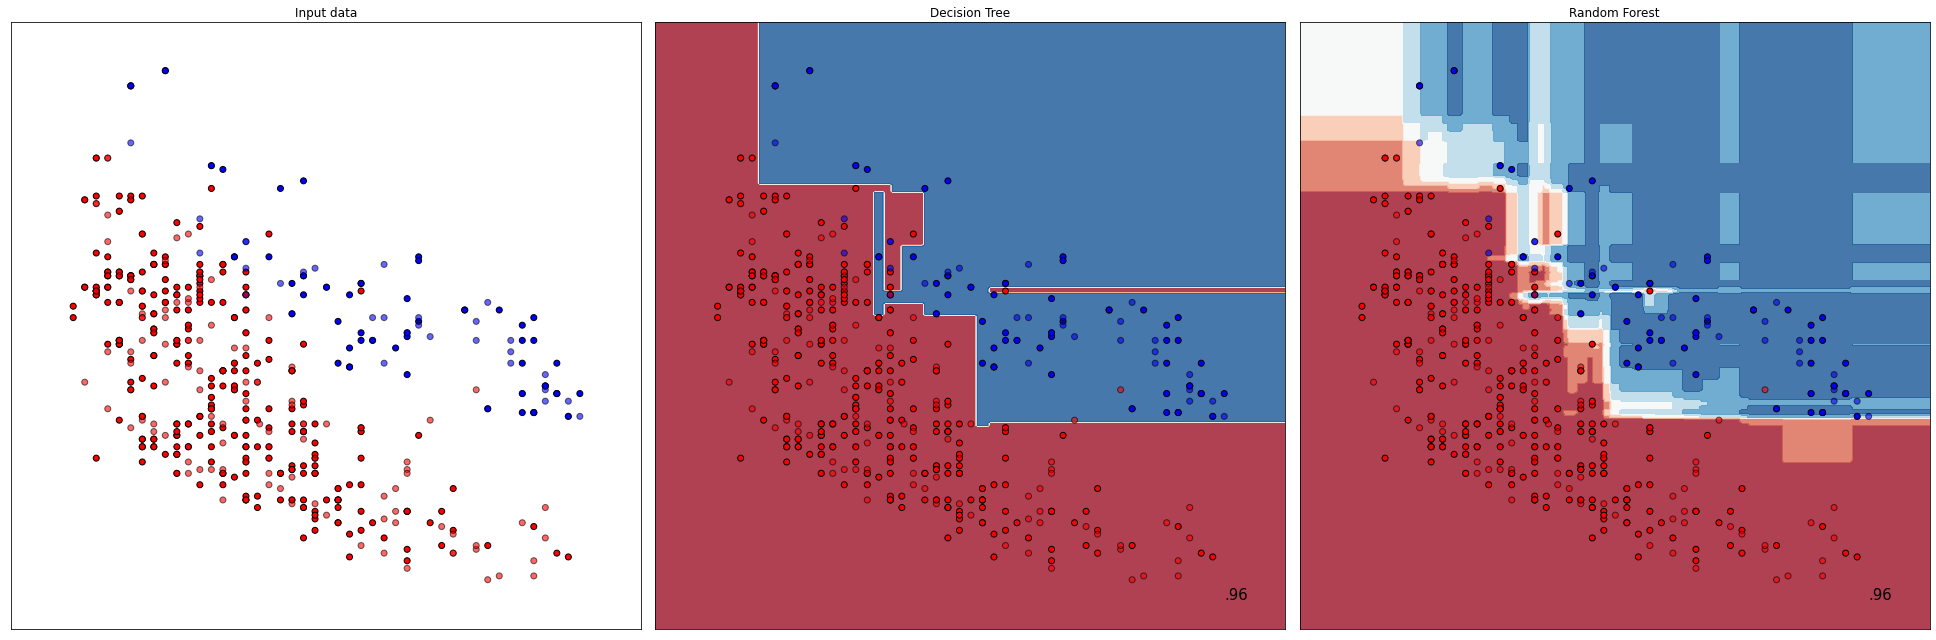

In [26]:
## Desicion Boundary ilustration
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

h = .02  # step size in the mesh

names = ["Decision Tree", "Random Forest"]

classifiers = [
    DecisionTreeClassifier(), # you can add more model
    RandomForestClassifier(n_estimators=20)]

X = wine[['alcohol','density']]
y = wine['label']
linearly_separable = (X, y)

datasets = [
            linearly_separable # you can add more dataset
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

## Data

In [30]:
bankloan= pd.read_csv('bankloan.csv')

In [32]:
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [45]:
x=bankloan[['employ','debtinc','creddebt','othdebt']]
y=bankloan['default']

## Splitting

In [46]:
x_train, x_test, y_train, y_test= train_test_split(x,y,
                                                  stratify=y,
                                                  test_size=0.2,
                                                  random_state=2020)

## random forest vs decision tree

In [47]:
dt= DecisionTreeClassifier(max_depth=3)
rf=RandomForestClassifier(max_depth=3, n_estimators=20, max_features=4)

In [48]:
models= (dt, rf)
score=[]
mean_score=[]
std_score=[]

for i in models:
    model_cv= cross_val_score(i,x_train,y_train)
    score.append(model_cv)
    mean_score.append(model_cv.mean())
    std_score.append(model_cv.std())
    
pd.DataFrame({
    'model': ['dt','rf'],
    'score':score,
    'mean':mean_score,
    'std':std_score
})

,model,score,mean,std
0,dt,"[0.8303571428571429, 0.7857142857142857, 0.839...",0.798214,0.031237
1,rf,"[0.8125, 0.7767857142857143, 0.821428571428571...",0.801786,0.015361


In [49]:
rf= RandomForestClassifier(max_depth=3, n_estimators= 20, max_features=4)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, max_features=4, n_estimators=20)

In [50]:
y_pred= rf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       103
           1       0.65      0.41      0.50        37

    accuracy                           0.79       140
   macro avg       0.73      0.66      0.68       140
weighted avg       0.77      0.79      0.77       140



In [51]:
pd.DataFrame({'imp':rf.feature_importances_}, index=list(x))

,imp
employ,0.263249
debtinc,0.529758
creddebt,0.180034
othdebt,0.026959


In [52]:
dt= DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [53]:
y_pred= dt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       103
           1       0.61      0.51      0.56        37

    accuracy                           0.79       140
   macro avg       0.72      0.70      0.71       140
weighted avg       0.78      0.79      0.78       140



In [54]:
pd.DataFrame({'imp':dt.feature_importances_}, index=list(x))

,imp
employ,0.322462
debtinc,0.518914
creddebt,0.158624
othdebt,0.000000


In [55]:
from sklearn.tree import plot_tree

In [ ]:
# plot_tree(rf) error

# latihan
1. voting classifier: coba gunakan soft voting:
        * dengan base learners basic
        * dengan base learner yang improved
    apakah ada perbedaan performa dengan hard voting?
    

2. gunakan data titanic, skema preprossing seperti biasa, metric evaluasi precision
    * bandingkan performa model decision tree dan random forest (cv dan dengan data test)
    * bandingkan juga feature importance dari masing-masing model

In [69]:
lr= LogisticRegression()
knn= KNeighborsClassifier(n_neighbors=3)
dt=DecisionTreeClassifier(max_depth=5)

In [70]:
vc=VotingClassifier([
    ('model1',lr),
    ('model2',knn),
    ('model3',dt)
], voting='soft')

In [71]:
vc.fit(x_train,y_train)
y_pred=vc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        84
           1       1.00      0.80      0.89        20

    accuracy                           0.96       104
   macro avg       0.98      0.90      0.93       104
weighted avg       0.96      0.96      0.96       104



In [72]:
lr= LogisticRegression(solver='liblinear', C=0.01)
lr_poly=PolynomialFeatures(degree=3,interaction_only=False, include_bias=False)
lr_pipe= Pipeline([
    ('poly',lr_poly),
    ('model',lr)
])  

knn=KNeighborsClassifier(n_neighbors=3)
knn_pipe=Pipeline([
    ('preprocess', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=3))
])

dt= DecisionTreeClassifier(max_depth=5)

In [73]:
vc=VotingClassifier([
    ('model1', lr_pipe),
    ('model2', knn_pipe),
    ('model3', dt)
], voting='soft')

In [74]:
vc.fit(x_train,y_train)
y_pred=vc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        84
           1       1.00      0.90      0.95        20

    accuracy                           0.98       104
   macro avg       0.99      0.95      0.97       104
weighted avg       0.98      0.98      0.98       104



In [86]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold

In [87]:
df=pd.read_csv('titanic.csv')
df.head()

,sex,age,parch,fare,class,deck,embark_town,alive,alone
0,male,22.0,0,7.2500,Third,NaN,Southampton,no,False
1,female,38.0,0,71.2833,First,C,Cherbourg,yes,False
2,female,26.0,0,7.9250,Third,NaN,Southampton,yes,True
3,female,35.0,0,53.1000,First,C,Southampton,yes,False
4,male,35.0,0,8.0500,Third,NaN,Southampton,no,True


In [88]:
ordinal_mapping = [
{
    'col' : 'class',
    'mapping' : {None : 0, 'First' : 1, 'Second' : 2, 'Third' : 3}
    }
]

one_hot_pipe = Pipeline([

('most_frequent', SimpleImputer(strategy='most_frequent')),
('one_hot_enc', OneHotEncoder(drop='first'))

])

transformer = ColumnTransformer([

('one-hot', one_hot_pipe, ['sex', 'alone', 'embark_town']),
('ordinal', ce.OrdinalEncoder(mapping=ordinal_mapping), ['class']),
('mean', SimpleImputer(strategy='median'),['age'])
], remainder='passthrough')

In [101]:
x=df.drop(['alive','deck'],axis=1)
y=[1 if i=='yes' else 0 for i in df['alive']]

In [102]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=2020,
    stratify = y)

In [103]:
def evaluate(df,model):

    model_name=[]
    f1_score=[]
    f1_std=[]
    for name, model in model:
        model = model
        estimator = Pipeline([
            ('preprocess', transformer),
            ('model', model)])

        skfold=StratifiedKFold(n_splits=5)
        score= cross_val_score(estimator,x_train,y_train,scoring='f1',cv=skfold).mean()
        std= cross_val_score(estimator,x_train,y_train,scoring='f1',cv=skfold).std()
        f1_score.append(score)
        f1_std.append(std)
        model_name.append(name)

    return pd.DataFrame({'Name': model_name,'f1_score':f1_score, 'f1_std':f1_std})

In [104]:
dt= DecisionTreeClassifier(max_depth=3)
rf=RandomForestClassifier(max_depth=3, n_estimators=20)
models=[
    ['decision tree', dt],
    ['random forest', rf]
]

In [105]:
evaluate(df,models)

,Name,f1_score,f1_std
0,decision tree,0.738463,0.046784
1,random forest,0.690002,0.040548


In [107]:
dt= DecisionTreeClassifier(max_depth=3)
pipe_dt= Pipeline([
    ('preprocessing', transformer),
    ('model',dt)
])

In [110]:
pipe_dt.fit(x_train,y_train)
print(classification_report(y_test,pipe_dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.73      0.67      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.77       179



In [121]:
pipe_dt[0].transformers_[0][1][1].get_feature_names()

array(['x0_male', 'x1_True', 'x2_Queenstown', 'x2_Southampton'],
      dtype=object)

In [127]:
pipe_dt[0].transformers_[1][1].get_feature_names()

['class']

In [132]:
features=list(pipe_dt[0].transformers_[0][1][1].get_feature_names())+pipe_dt[0].transformers_[1][1].get_feature_names()+['age','parch','fare']

In [137]:
pipe_dt[1]

DecisionTreeClassifier(max_depth=3)

In [138]:
pd.DataFrame({
    'imp':pipe_dt[1].feature_importances_}, index=features)

,imp
x0_male,0.628704
x1_True,0.000000
x2_Queenstown,0.000000
x2_Southampton,0.000000
class,0.172485
age,0.064861
parch,0.000000
fare,0.133950


In [134]:
rf=RandomForestClassifier(max_depth=3, n_estimators=20)
pipe_rf= Pipeline([
    ('preprocessing', transformer),
    ('model',rf)
])

In [135]:
pipe_rf.fit(x_train,y_train)
print(classification_report(y_test,pipe_rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.94      0.84       110
           1       0.84      0.55      0.67        69

    accuracy                           0.79       179
   macro avg       0.81      0.74      0.76       179
weighted avg       0.80      0.79      0.78       179



In [139]:
pd.DataFrame({
    'imp':pipe_rf[1].feature_importances_}, index=features)

,imp
x0_male,0.522552
x1_True,0.052317
x2_Queenstown,0.014100
x2_Southampton,0.020935
class,0.157725
age,0.054862
parch,0.008082
fare,0.169428
